_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 105       
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


ValueError: Found input variables with inconsistent numbers of samples: [87780, 4389]

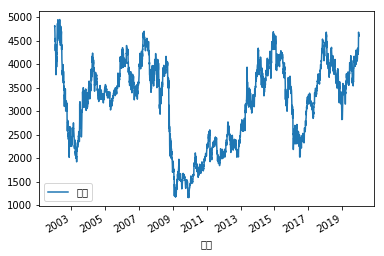

In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten
from tensorflow.keras import models
from tensorflow.keras.models import Model

data = pd.read_csv("./old6501TimeChart.csv",
               encoding='shift_jis',
               index_col='日付',
               parse_dates=True,
               usecols = [0,1]).dropna(axis = 1).dropna()
data.plot()

model_1 = models.Sequential()
model_1.add(Dense(5, activation='relu', input_shape=(20,)))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='linear'))
model_1.summary()
model_1.compile(optimizer='adam',
           loss='mse',
           metrics=['mae'])

def getInputLabel(data, period=20):
    period = period
    input_tensor = []
    label_tensor = []
    for i in range(0, len(data) - period, 1):
        input_tensor=np.append(input_tensor,data.values[i:i + period,0])
        label_tensor=np.append(label_tensor,data.values[i + period,0])
        input_tensor = np.array(input_tensor)
        label_tensor = np.array(label_tensor)
    return input_tensor, label_tensor

tmp = data - data.mean()
tmp = tmp/data.std()

input_tensor, label_tensor = getInputLabel(data = tmp)

X_train, X_test, y_train, y_test = train_test_split(input_tensor, label_tensor, test_size=0.2,random_state=100, shuffle = False)